In [1]:
import scipy.io 
import numpy as np 
import matplotlib.pyplot as plt 
import alphashape
from scipy.interpolate import interp1d
from scipy.spatial import ConvexHull
from scipy.optimize import curve_fit
from shapely.geometry import Polygon, MultiPolygon

In [2]:
#file_path = r'C:\Users\josep\Desktop\Summer Research Project\white_pixels.mat'
data = scipy.io.loadmat('C:\\Users\josep\Downloads\processedEdges_sp3.mat') 

# Extract the frames 
processed_edges = data['processedEdges'] 

In [3]:
processed_edges[0,0].shape

(360, 1280)

In [84]:
i = 200

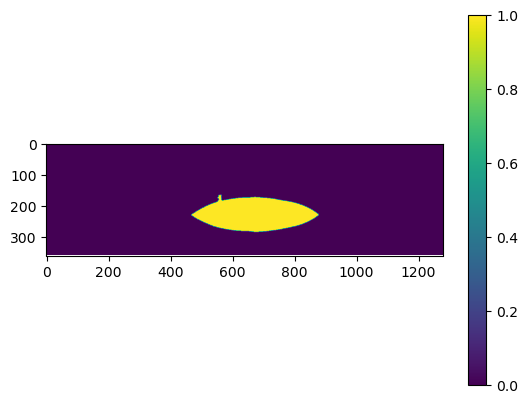

In [85]:
plt.imshow(processed_edges[0, i], cmap='viridis')  
plt.colorbar()  
plt.show()

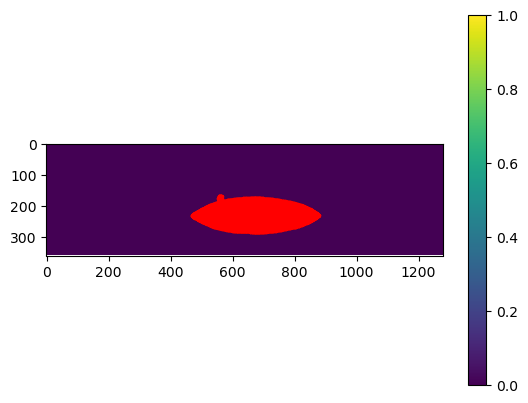

In [86]:
# Extract the 2D array
data = processed_edges[0, i]

# Find indices where values are greater than 0.8
y, x = np.where(data > 0.8)

# Plot the 2D array
plt.imshow(data, cmap='viridis')
plt.colorbar()

# Overlay the points
plt.scatter(x, y, color='red', s=2)

# Show the plot
plt.show()

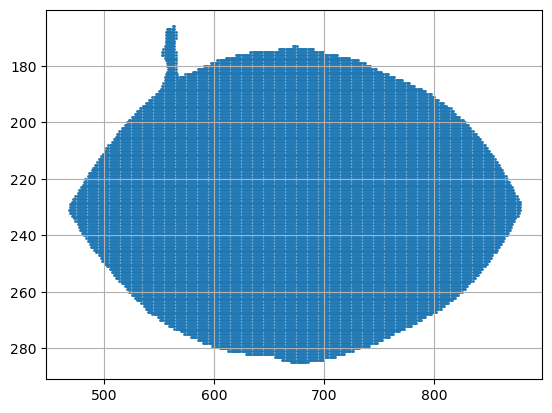

In [87]:
plt.figure()
plt.scatter(x, y, s = 1)
plt.grid(True)
plt.gca().invert_yaxis()
#plt.ylim(400,-200)
plt.show()

In [88]:
y_line = 230

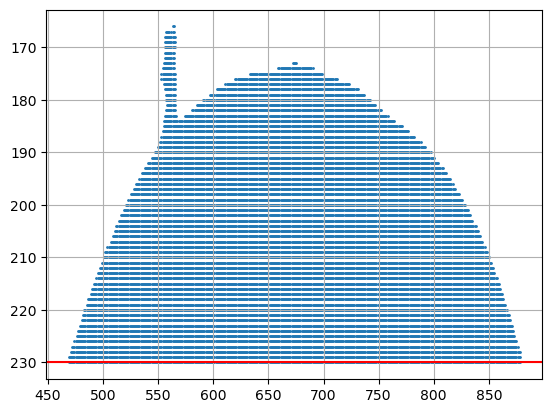

In [89]:
x_filtered = x[y <= y_line]
y_filtered = y[y <= y_line]

plt.figure()
plt.scatter(x_filtered, y_filtered, s=1)
plt.grid(True)
plt.gca().invert_yaxis()
#plt.ylim(400, -200)

plt.axhline(y=y_line, color='r', linestyle='-')
plt.show()

In [90]:
half_point = (np.min(x_filtered) + np.max(x_filtered)) / 2
half_point

673.5

In [91]:
half_mask = [x_filtered <= half_point][0]

In [92]:
x_half = x_filtered[half_mask]
y_half = y_filtered[half_mask]

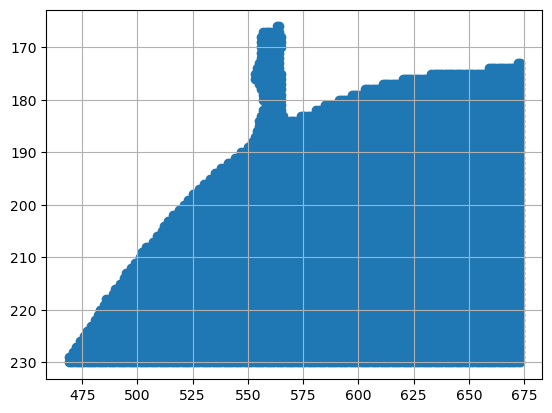

In [93]:
plt.scatter(x_half, y_half)
plt.grid(True)
plt.gca().invert_yaxis()

In [94]:
j = x_half == 676.5
np.where(j == True)


(array([], dtype=int64),)

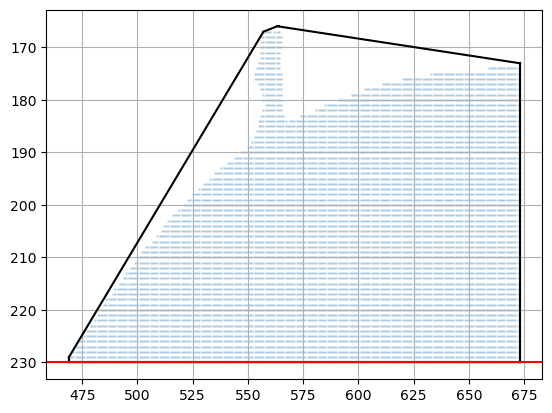

In [95]:
# Assuming x, y, and y_line are already defined
x_filtered = x_half[y_half <= y_line]
y_filtered = y_half[y_half <= y_line]

# Find the convex hull
points = np.vstack((x_filtered, y_filtered)).T
hull = ConvexHull(points)

# Plot the points
plt.figure()
plt.scatter(x_filtered, y_filtered, s=1, alpha=0.2)  # Plot all points with low opacity

# Plot the convex hull
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', lw=1.5)  # Edge of the shape

plt.grid(True)
plt.gca().invert_yaxis()
plt.axhline(y=y_line, color='r', linestyle='-')
plt.show()

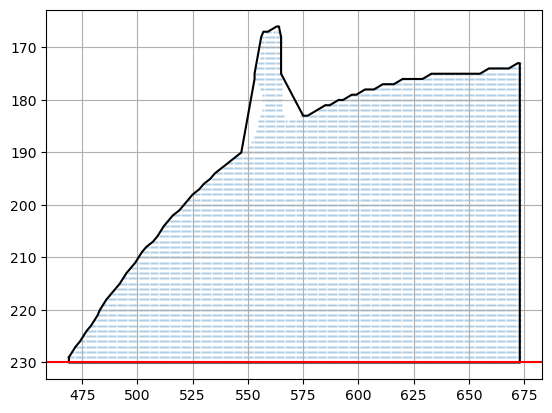

In [96]:
x_filtered = x_half[y_half <= y_line]
y_filtered = y_half[y_half <= y_line]

# Create points array
points = np.vstack((x_filtered, y_filtered)).T

# Compute the alpha shape with a suitable alpha value
alpha = 0.1  #
alpha_shape = alphashape.alphashape(points, alpha)

# Plot the alpha shape
plt.figure()
plt.scatter(x_filtered, y_filtered, s=1, alpha=0.2)  
# Check if the alpha shape is a Polygon or MultiPolygon and plot accordingly
if isinstance(alpha_shape, Polygon):
    x_edge, y_edge = alpha_shape.exterior.xy
    plt.plot(x_edge, y_edge, 'k-', lw=1.5)
elif isinstance(alpha_shape, MultiPolygon):
    for poly in alpha_shape:
        x_edge, y_edge = poly.exterior.xy
        plt.plot(x_edge, y_edge, 'k-', lw=1.5)

plt.grid(True)
plt.gca().invert_yaxis()
plt.axhline(y=y_line, color='r', linestyle='-')
plt.show()

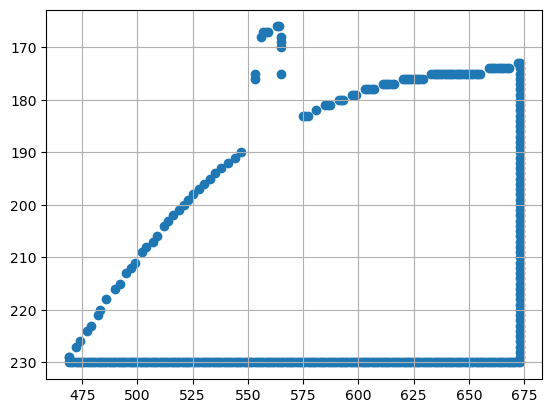

In [97]:
plt.scatter(x_edge, y_edge)
plt.grid(True)
plt.gca().invert_yaxis()

In [98]:
def plot_extreme_x_points(x_edge, y_edge, target_y):
    """
    Plots the smallest and largest x values at target_y along with the other points.
    
    Parameters:
    x_edge (list): List of x coordinates.
    y_edge (list): List of y coordinates.
    target_y (int or float): The y value to filter the x values.
    """
    # Separate points at target_y and other points
    x_at_target_y = [x_edge[i] for i in range(len(y_edge)) if y_edge[i] == target_y]
    x_other = [x_edge[i] for i in range(len(y_edge)) if y_edge[i] != target_y]
    y_other = [y_edge[i] for i in range(len(y_edge)) if y_edge[i] != target_y]

    # Find the smallest and largest x values at target_y
    if x_at_target_y:  # Ensure there's at least one point at target_y
        x_min = min(x_at_target_y)
        x_max = max(x_at_target_y)

        # Create new lists for plotting the points at target_y
        x_filtered = [x_min, x_max]
        y_filtered = [target_y, target_y]

        # Plot the filtered points at target_y
        #plt.scatter(x_filtered, y_filtered, color='red', label=f'Points at y={target_y} (min/max x)')
    
    # Plot the other points
   # plt.scatter(x_other, y_other, color='blue', label='Other points')

    # Add grid, invert y-axis, and show plot
    #plt.grid(True)
    #plt.gca().invert_yaxis()
    #plt.legend()
    #plt.show()

    new_x = np.concatenate((x_filtered, x_other))
    new_y = np.concatenate((y_filtered, y_other))

    return new_x, new_y

    

target_y = 230

In [99]:
x_main_edge, y_main_edge = plot_extreme_x_points(x_edge, y_edge, target_y)

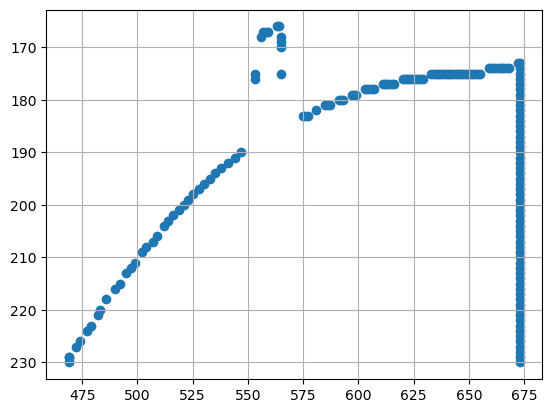

In [100]:
plt.scatter(x_main_edge, y_main_edge)
plt.grid(True)
plt.gca().invert_yaxis()

In [101]:
mask_middle = np.where( np.isclose(x_main_edge, half_point, atol= 0.5) )

In [102]:
#Get all indices
all_indices = np.arange(x_main_edge.shape[0])

# Get indices that are not in mask_middle
ind_not_middle = np.setdiff1d(all_indices, mask_middle)

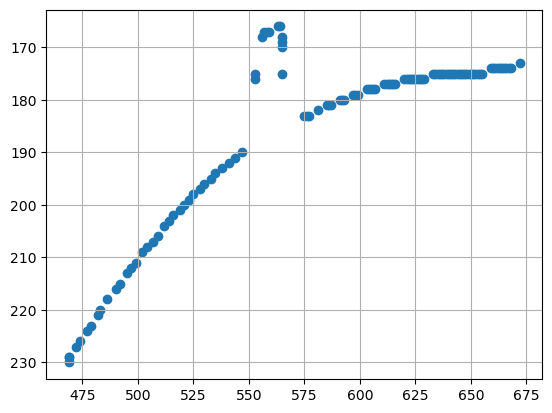

In [103]:
plt.scatter(x_main_edge[ind_not_middle], y_main_edge[ind_not_middle])
plt.grid(True)
plt.gca().invert_yaxis()

In [104]:
x_half = x_main_edge[ind_not_middle]
y_half = y_main_edge[ind_not_middle]

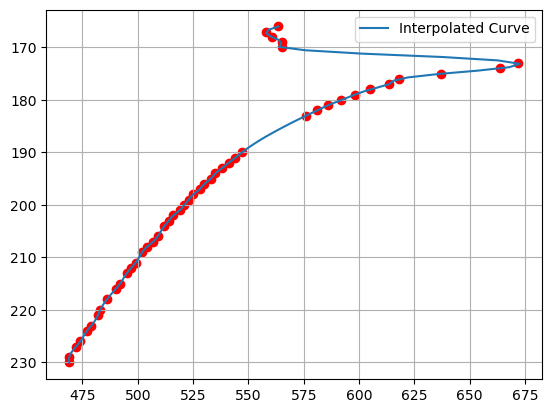

In [105]:
# Alternatively, you can average the y values for duplicate x values
from collections import defaultdict

y_to_x = defaultdict(list)
for x, y in zip(x_half, y_half):
    y_to_x[y].append(x)

unique_y = np.array(sorted(y_to_x.keys()))
unique_x = np.array([np.mean(y_to_x[y]) for y in unique_y])

# Create the interpolation function
f = interp1d(unique_y, unique_x, kind='quadratic')

# Generating more points for smoother interpolation
y_curve1 = np.linspace(min(unique_y), max(unique_y), 100)
x_curve1 = f(y_curve1)

# Plotting
plt.plot(x_curve1, y_curve1, '-', label='Interpolated Curve')
plt.scatter(unique_x, unique_y, color = 'red', zorder=1)
plt.gca().invert_yaxis()

#plt.xlim(420, 460)
#plt.ylim(232, 220)
plt.legend()
plt.grid(True)
plt.show()

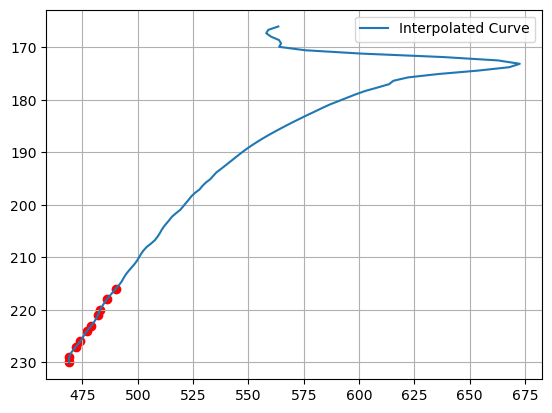

In [106]:
# Plotting
plt.plot(x_curve1, y_curve1, '-', label='Interpolated Curve')
plt.scatter(unique_x[-10:], unique_y[-10:], color = 'red', zorder=1)
plt.gca().invert_yaxis()

#plt.xlim(420, 460)
#plt.ylim(232, 220)
plt.legend()
plt.grid(True)
plt.show()

In [107]:
no_of_points = 20

x_edge_points = unique_x[-no_of_points:]
y_edge_points = unique_y[-no_of_points:]

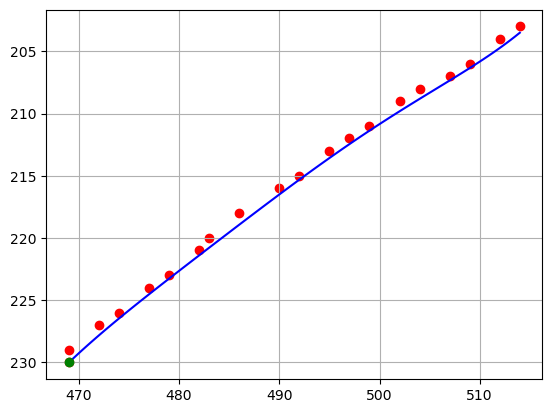

In [108]:
# Find the index of the maximum y value
max_y_index = np.argmax(y_edge_points)
max_x_point = x_edge_points[max_y_index]
max_y_point = y_edge_points[max_y_index]

# Define the degree of the polynomial
degree = 6

# Fit a polynomial to the data points
coeffs = np.polyfit(x_edge_points, y_edge_points, degree)

# Adjust the polynomial to pass through the (max_x_point, max_y_point)
poly = np.poly1d(coeffs)

# Evaluate the polynomial at the max_x_point
y_at_max_x = poly(max_x_point)

# Calculate the adjustment needed for the constant term
adjustment = max_y_point - y_at_max_x

# Create the adjusted polynomial
coeffs[-1] += adjustment
poly_adjusted = np.poly1d(coeffs)

# Create the fitted polynomial line
x_fit = np.linspace(np.min(x_edge_points), np.max(x_edge_points), 100)
y_fit = poly_adjusted(x_fit)

# Plot the original scatter points
plt.scatter(x_edge_points, y_edge_points, color='red', zorder=1)

# Plot the fitted polynomial
plt.plot(x_fit, y_fit, color='blue', zorder=2)

# Mark the point with maximum y value
plt.scatter(max_x_point, max_y_point, color='green', zorder=3)

# Invert the y-axis
plt.gca().invert_yaxis()

# Set limits if desired (uncomment to use)
# plt.xlim(420, 460)
# plt.ylim(232, 220)

# Show grid
plt.grid(True)
plt.show()

In [109]:
index_min_x = np.argmax(y_fit)
y_at_min_x = y_fit[index_min_x]
index_min_x, y_at_min_x

(0, 230.0)

In [110]:
x_fit[1]-x_fit[0]

0.45454545454543904

In [111]:
index_min_x

0

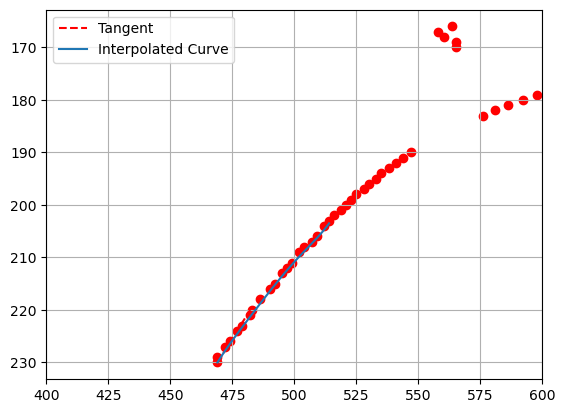

In [112]:
# calculate the derivative at the point
if index_min_x==0:
    dx_new = x_fit[0]-x_fit[1]

if index_min_x > 0:
    dx_new = x_fit[index_min_x-1] - x_fit[index_min_x]



if dx_new>0:
    dx = -dx_new
if dx_new<0:
    dx = np.abs(dx_new)

#dx = np.abs(x_curve1[index_min_x-1] - x_curve1[index_min_x] )
dy_dx = np.gradient(y_fit, dx)
slope_at_min_x1 = dy_dx[index_min_x]

# tangent line
y_tangent1 = np.linspace(max(y_fit), max(y_fit)-10, 100)
x_tangent1 = ( 1/slope_at_min_x1 ) * (y_tangent1 - y_fit[index_min_x]) + x_fit[index_min_x]


plt.plot(x_tangent1, y_tangent1, color='red', linestyle='--', label='Tangent') 
plt.scatter(unique_x, unique_y, color = 'red', zorder=1)

#plt.scatter(unique_x, unique_y, color = 'red', zorder=1)
plt.grid(True)
plt.plot(x_fit, y_fit, label='Interpolated Curve')

plt.legend()
plt.gca().invert_yaxis()

#plt.xlim(433, 450)
#plt.ylim(231, 220)
plt.xlim(400, 600)

plt.show()

In [113]:
angle_tangent_degrees_left = np.degrees(np.arctan(slope_at_min_x1))
# Measure angle on right side of interpolation 

if angle_tangent_degrees_left<0:
    angle = np.abs(angle_tangent_degrees_left)

if angle_tangent_degrees_left>0:
    angle = 180 - angle_tangent_degrees_left

In [114]:
angle 

37.20747627605169